In [1]:
import mxnet as mx 
from symbol import get_resnet_model
from symbol import YOLO_loss
from data_ulti import get_iterator

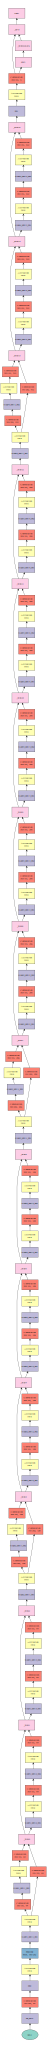

In [7]:
# get sym 
sym = get_resnet_model('pretrained_models/resnet-34', 0)
_, args_params, aux_params = mx.model.load_checkpoint('pretrained_models/resnet-34', 0)
logit = sym.get_internals()['logit_output']
mx.viz.plot_network(logit)

In [13]:
a=list(args_params.values())
a[3]


[[[[-5.95233329e-02 -1.64283197e-02 -4.03142907e-02]
   [-4.44992958e-03 -3.25952210e-02  1.07169347e-02]
   [-1.17819430e-03 -4.10059243e-02 -3.10280193e-02]]

  [[ 2.58224038e-08 -3.92039539e-08 -1.59139812e-08]
   [ 2.15325766e-08 -2.00152983e-09  2.06223358e-08]
   [ 5.04468858e-08  5.71044403e-08  3.97410496e-08]]

  [[ 6.61952095e-03  1.72853153e-02  1.10373169e-03]
   [-8.63767415e-03  2.88922545e-02  2.76926882e-03]
   [ 2.64887791e-02  3.30336429e-02  1.32937012e-02]]

  ...

  [[ 2.17885869e-08  1.76854495e-08  5.56460655e-10]
   [ 1.96203533e-08  8.95446473e-09 -9.00581565e-09]
   [ 1.69713150e-08  4.23773949e-09 -8.91443719e-09]]

  [[-8.65749363e-03 -3.39040197e-02 -1.43859731e-02]
   [-7.68432813e-03 -3.15683186e-02  3.46270204e-02]
   [ 5.77081041e-03 -5.89340972e-03  5.49186079e-04]]

  [[-7.52079412e-02 -1.01656221e-01  9.28862765e-03]
   [ 1.86335683e-01  2.46422276e-01 -1.80925429e-01]
   [ 7.62825012e-02  3.06155592e-01 -1.51381373e-01]]]


 [[[ 5.03038801e-02  1.5

In [14]:
# get some input 
train_data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)
val_data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)

In [15]:
mod = mx.mod.Module(symbol=sym, context=mx.gpu(0))

In [16]:
mod.bind(train_data.provide_data, train_data.provide_label)

In [17]:
mod.init_params(allow_missing=True, arg_params=args_params, aux_params=aux_params, 
                initializer=mx.init.Xavier(magnitude=2,rnd_type='gaussian',factor_type='in'))

In [18]:
out = mod.predict(eval_data=train_data, num_batch=1)

In [19]:
out

[
 [[[[ 0.2633458  -0.27540243  0.529191    0.15474087  0.30622163]
    [ 0.12325817 -0.58958393  0.44396883 -0.11850265  0.41564372]
    [ 0.41342556 -0.74255776  0.46788862  0.09381324  0.5462011 ]
    [ 0.5056945  -0.7552672   0.55990964  0.4155126   0.7453063 ]
    [ 0.61496764 -0.749209    0.648082   -0.05959025  0.7059307 ]
    [ 0.55772406 -0.70571953  0.6670735  -0.18080623  0.6635426 ]
    [ 0.47750127 -0.61221683  0.558325   -0.41489416  0.31947094]]
 
   [[ 0.4551587  -0.13283707  0.49743474  0.2509221   0.4141475 ]
    [ 0.5891101  -0.59806573  0.43324596  0.37442696  0.6188566 ]
    [ 0.71784145 -0.76564616  0.6759696   0.3950532   0.7116755 ]
    [ 0.71784955 -0.8149398   0.8207674   0.51128584  0.8066125 ]
    [ 0.5222226  -0.8010578   0.84511596 -0.00552983  0.8214855 ]
    [ 0.17931972 -0.7871248   0.81322724 -0.44386297  0.67542547]
    [ 0.28988585 -0.67828226  0.6805657  -0.6703025  -0.08176304]]
 
   [[ 0.4282815  -0.32550487  0.43139777 -0.23165627  0.5531536 ]
  